# The Sparks Foundation: Data Science & Business Analytics Internship
# Author: Snehal Gat
# Task: Exploratory Data Analysis - Terrorism
# #GRIPMARCH23

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("globalterrorismdb_0718dist.csv", encoding="ISO-8859-1")

In [3]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
data.shape

(181691, 135)

In [5]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [7]:
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

<Axes: >

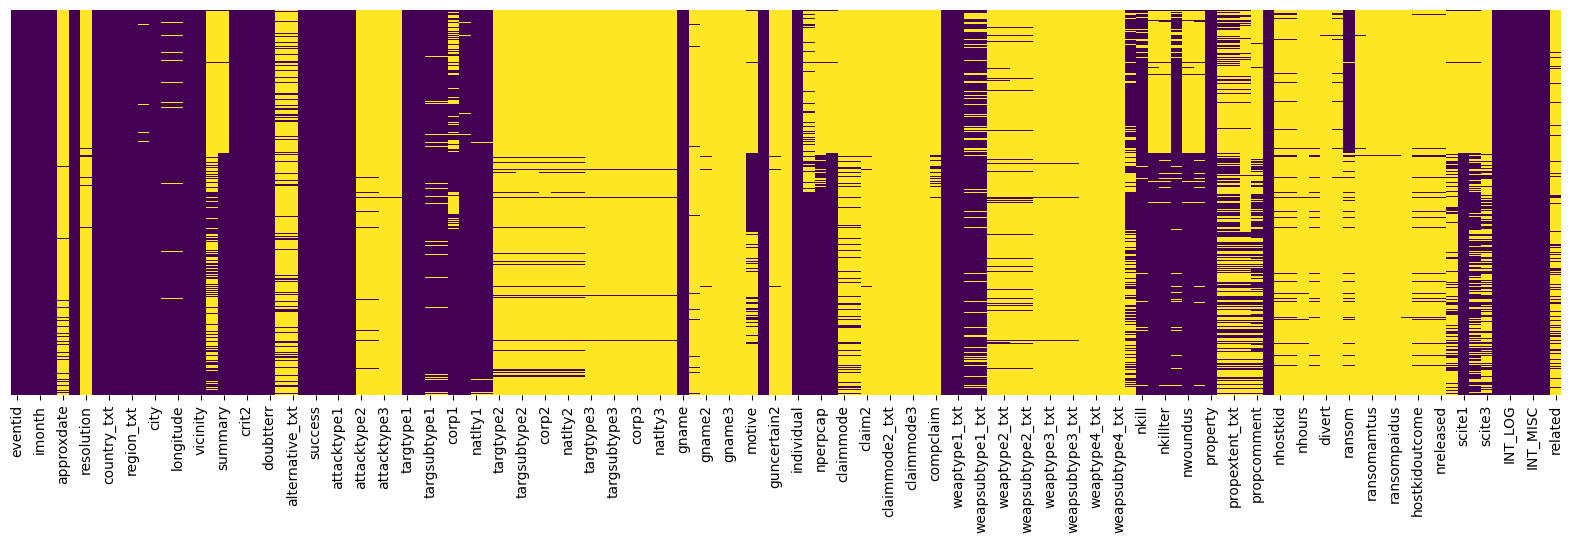

In [8]:
plt.figure(figsize=(20,5))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap="viridis")

### The above visualization is not that clear, so we'll try a different method

In [9]:
#writing these below codes to check all data
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.width',None)

In [10]:
data.isnull().sum()

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            172452
extended                   0
resolution            179471
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                421
city                     434
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
attacktype2           175377
attacktype2_txt       175377
attacktype3           181263
attacktype3_txt       181263
targtype1     

### There are so many missing data in so many unwanted columns

In [11]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

### So, now we're creating a new DataFrame with useful columns

In [12]:
datanew=data[['iyear' , 'imonth','iday','country_txt','provstate','region_txt','city','latitude','longitude',
         'attacktype1_txt','nkill','nwound','target1','summary','gname','targtype1_txt','weaptype1_txt','motive']]

### Renaming the columns names for better understanding

In [13]:
datanew.rename(columns={'iyear':'YEAR','imonth':'MONTH','iday':"DAY",'gname':'GROUP','country_txt':'COUNTRY','region_txt':'REGION','provstate':'STATE','attacktype1_txt':'ATTACK_TYPE','targtype1_txt':'TARGET_TYPE','weaptype1_txt':'WEAPON','nkill':'KILL',
     'nwound':'WOUND'},inplace=True)

In [14]:
datanew.head()  #the new DataFrame created

,YEAR,MONTH,DAY,COUNTRY,STATE,REGION,city,latitude,longitude,ATTACK_TYPE,KILL,WOUND,target1,summary,GROUP,TARGET_TYPE,WEAPON,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [15]:
datanew.shape

(181691, 18)

### Initially there're 135 columns and now its only 18, but the records are same 181691

In [16]:
datanew.isnull().sum()

YEAR                0
MONTH               0
DAY                 0
COUNTRY             0
STATE             421
REGION              0
city              434
latitude         4556
longitude        4557
ATTACK_TYPE         0
KILL            10313
WOUND           16311
target1           636
summary         66129
GROUP               0
TARGET_TYPE         0
WEAPON              0
motive         131130
dtype: int64

In [17]:
datanew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   YEAR         181691 non-null  int64  
 1   MONTH        181691 non-null  int64  
 2   DAY          181691 non-null  int64  
 3   COUNTRY      181691 non-null  object 
 4   STATE        181270 non-null  object 
 5   REGION       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   ATTACK_TYPE  181691 non-null  object 
 10  KILL         171378 non-null  float64
 11  WOUND        165380 non-null  float64
 12  target1      181055 non-null  object 
 13  summary      115562 non-null  object 
 14  GROUP        181691 non-null  object 
 15  TARGET_TYPE  181691 non-null  object 
 16  WEAPON       181691 non-null  object 
 17  motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [18]:
datanew['WOUND'] = datanew['WOUND'].fillna(0)
datanew['KILL'] = datanew['KILL'].fillna(0)
datanew['GROUP'] = datanew['GROUP'].fillna(0)
# replacing all the null values present in 'WOUND', 'KILL', and 'GROUP' with zero(0)

In [19]:
datanew['COUNTRY'].value_counts().idxmax()  #Country with the most number of attacks

'Iraq'

In [20]:
datanew['REGION'].value_counts().idxmax()  #Region with the most number of attacks

'Middle East & North Africa'

In [21]:
datanew['YEAR'].value_counts().idxmax()  #Year with the most number of attacks

2014

In [22]:
datanew['MONTH'].value_counts().idxmax()  #Month with the most number of attacks

5

### 5 = May

In [23]:
datanew['GROUP'].value_counts().idxmax()

'Unknown'

In [24]:
datanew['ATTACK_TYPE'].value_counts().idxmax()  #Most type of attacks

'Bombing/Explosion'

In [25]:
datanew['YEAR'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017], dtype=int64)

In [26]:
y = datanew['YEAR'].value_counts(dropna = False).sort_index()
y

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: YEAR, dtype: int64

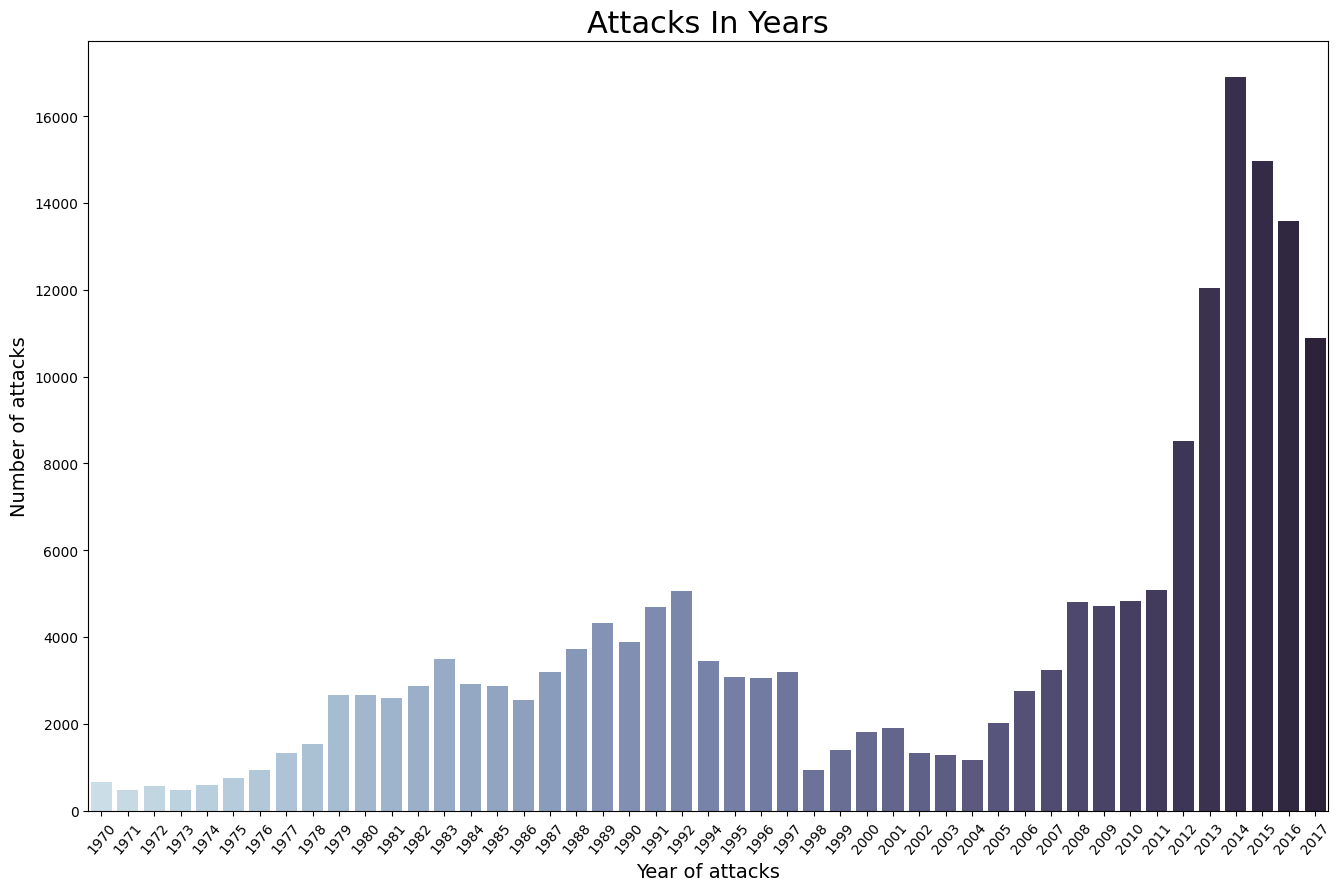

In [27]:
plt.figure(figsize = (16,10))
sns.barplot(x = datanew['YEAR'].unique(),y = datanew['YEAR'].value_counts(dropna = False).sort_index(),palette = "ch:s=.25,rot=-.25")
plt.xticks(rotation = 50)
plt.xlabel('Year of attacks',fontsize=14)
plt.ylabel('Number of attacks',fontsize=14)
plt.title('Attacks In Years',fontsize=22)
plt.show()

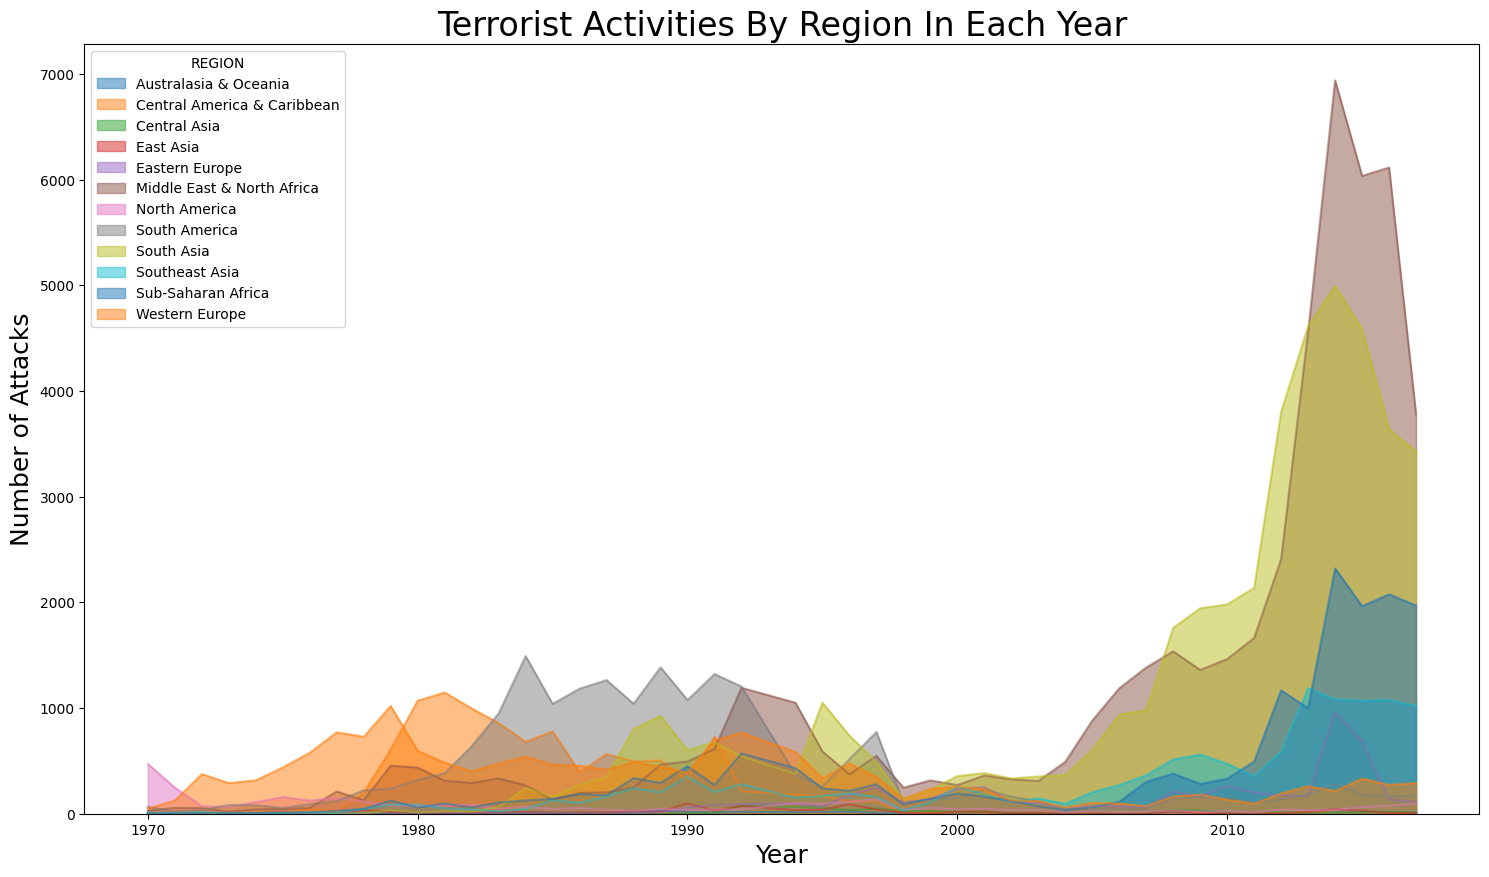

In [28]:
pd.crosstab(datanew.YEAR, datanew.REGION).plot(kind='area',stacked=False,figsize=(18,10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=24)
plt.ylabel('Number of Attacks',fontsize=18)
plt.xlabel("Year",fontsize=18)
plt.show()

In [29]:
country = datanew.COUNTRY.value_counts()[:10]
country

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: COUNTRY, dtype: int64

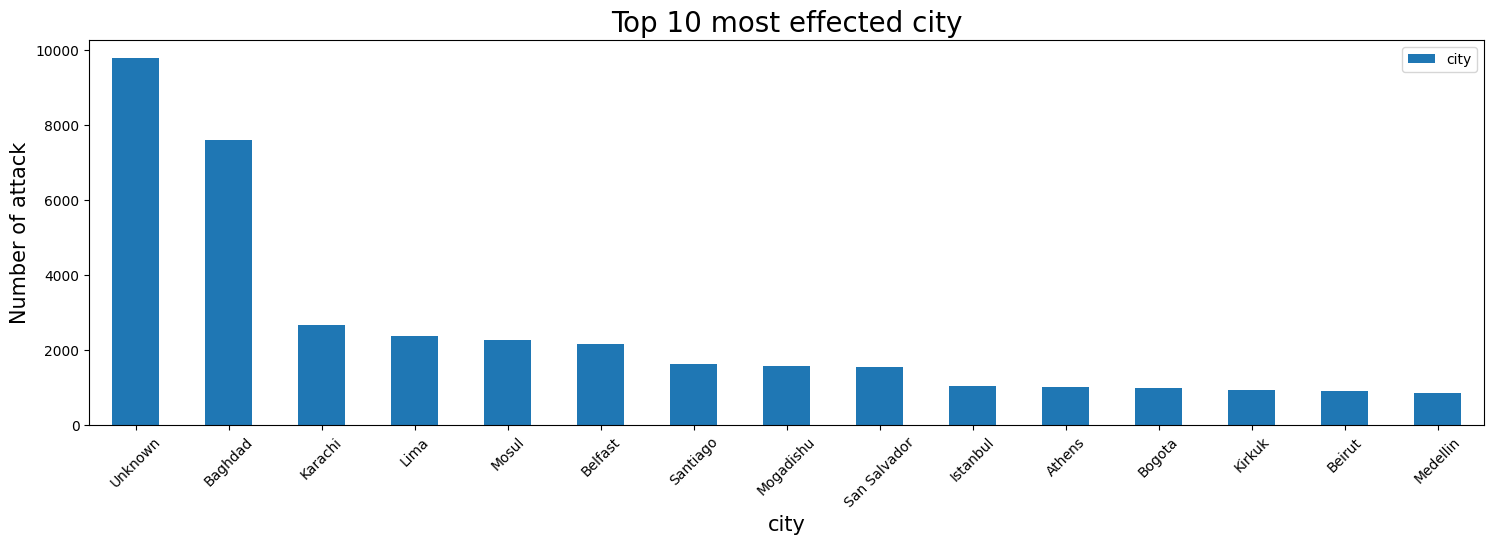

In [30]:
#top 10 cities affected
datanew['city'].value_counts().to_frame().sort_values('city',axis=0,ascending=False).head(15).plot(kind='bar',figsize=(18,5))
plt.xticks(rotation = 45)
plt.xlabel("city",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Top 10 most effected city",fontsize=20)
plt.show()

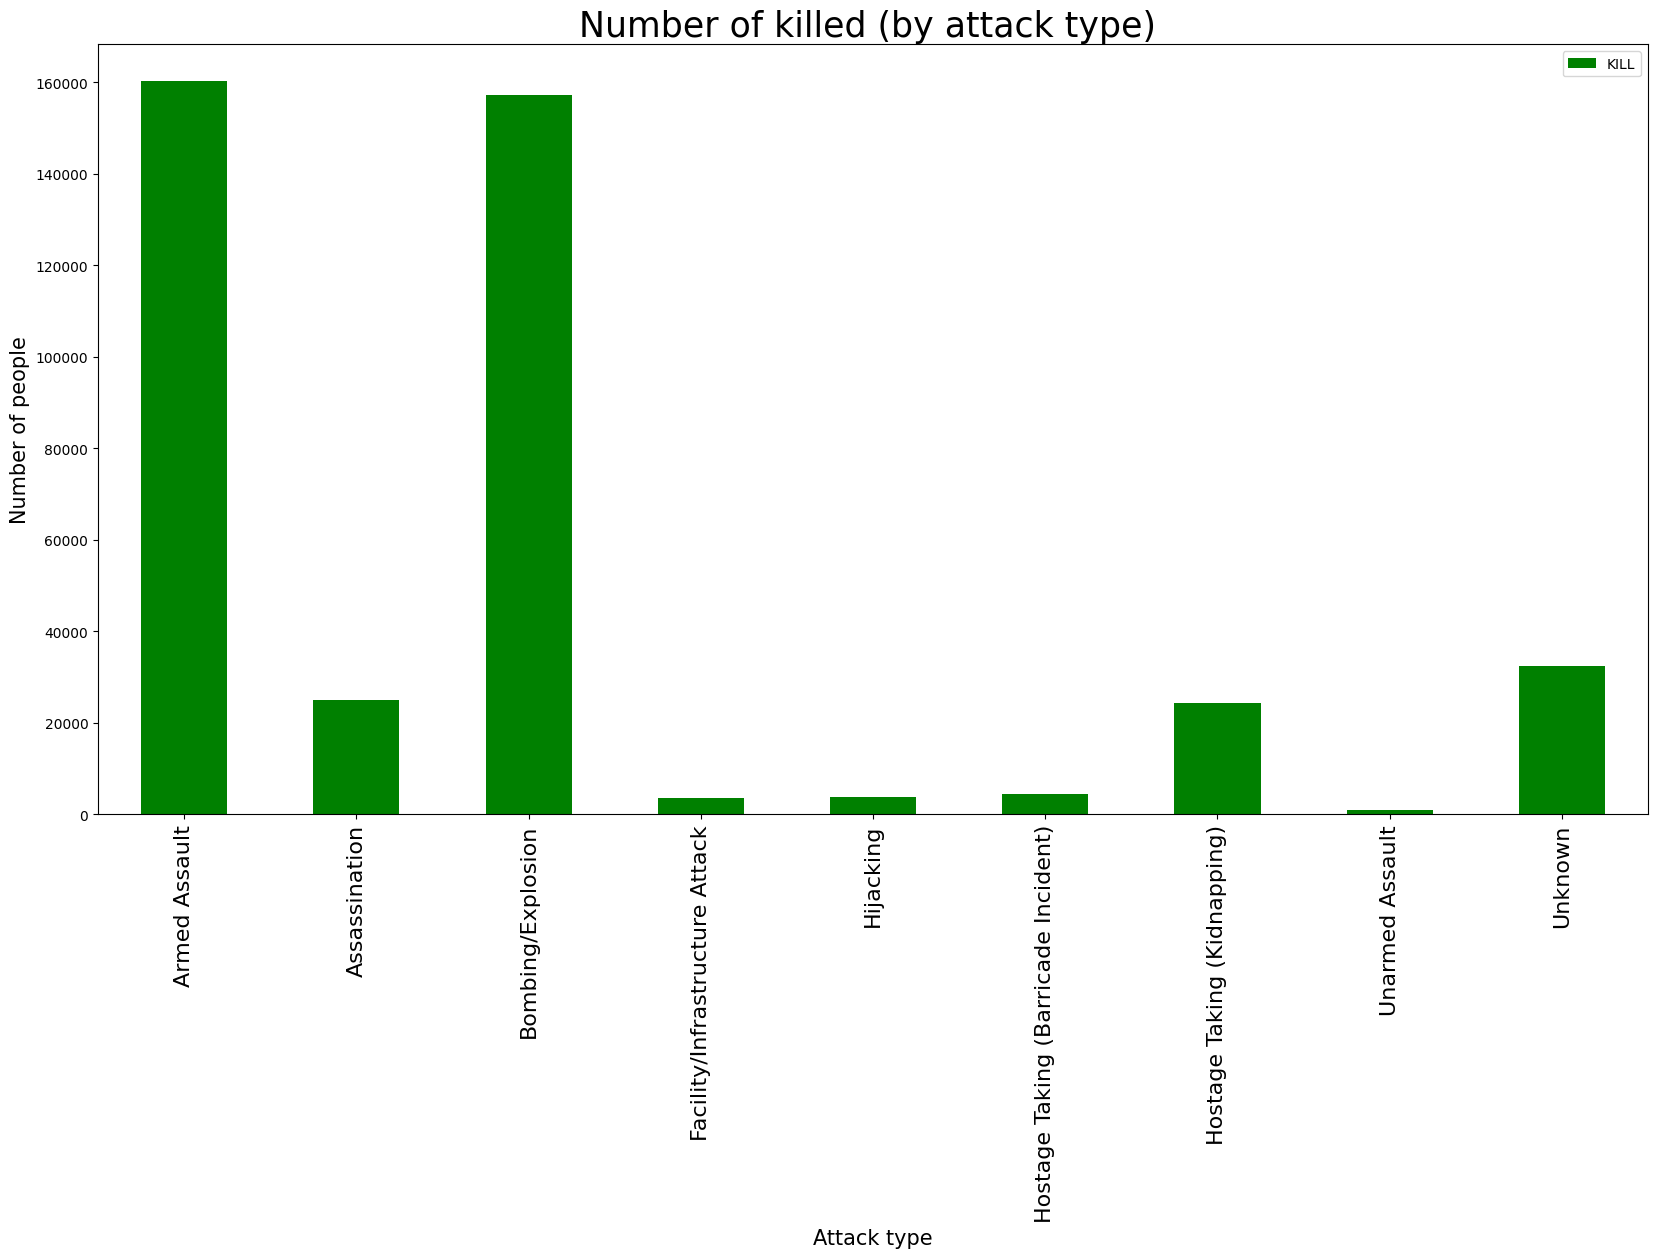

In [31]:
datanew[['ATTACK_TYPE','KILL']].groupby(["ATTACK_TYPE"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['g'])
plt.xticks(rotation=50)
plt.title("Number of killed (by attack type) ",fontsize=25)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.xticks(rotation= 90, fontsize = 16)
plt.show()

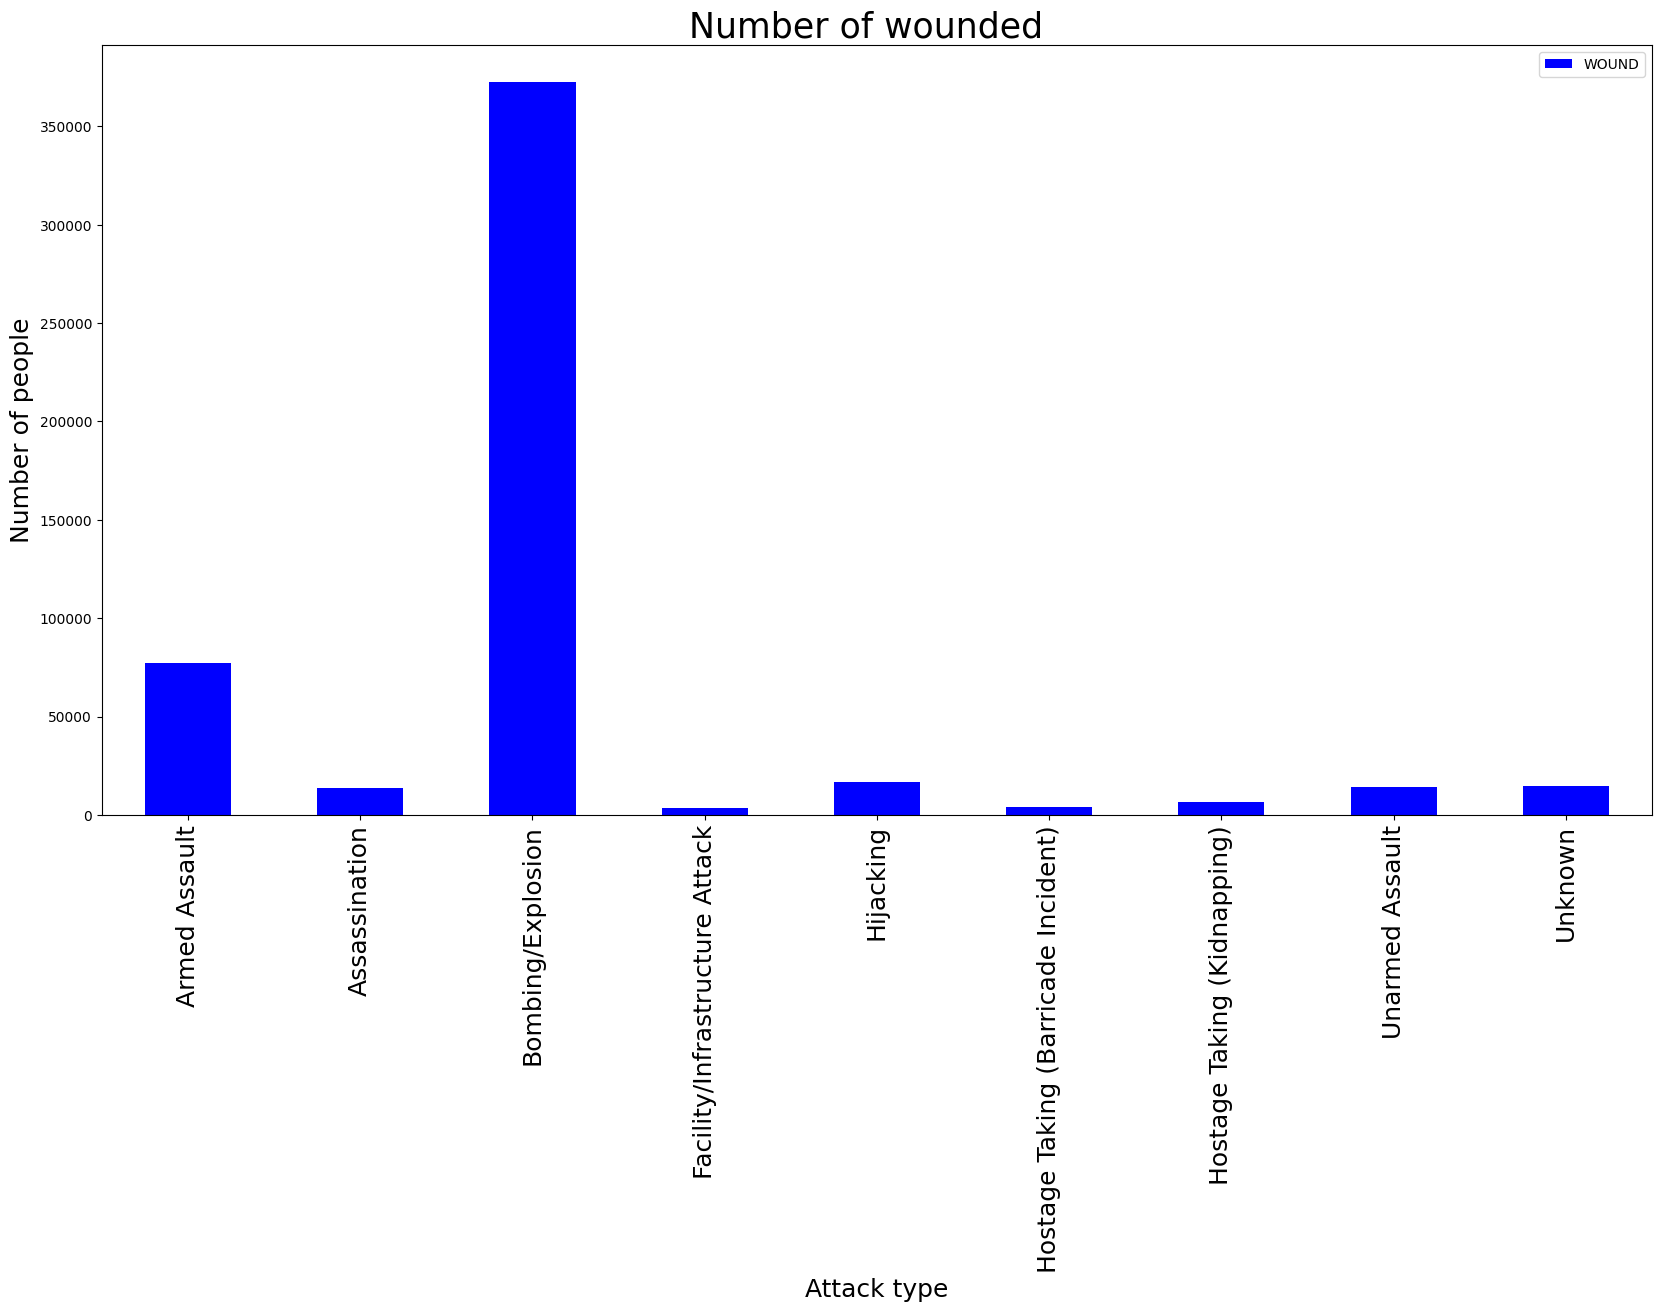

In [32]:
datanew[['ATTACK_TYPE','WOUND']].groupby(["ATTACK_TYPE"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['b'])
plt.xticks(rotation=50)
plt.title("Number of wounded  ",fontsize=25)
plt.ylabel('Number of people',fontsize=18)
plt.xlabel('Attack type',fontsize=18)
plt.xticks(rotation= 90, fontsize = 18)
plt.show()

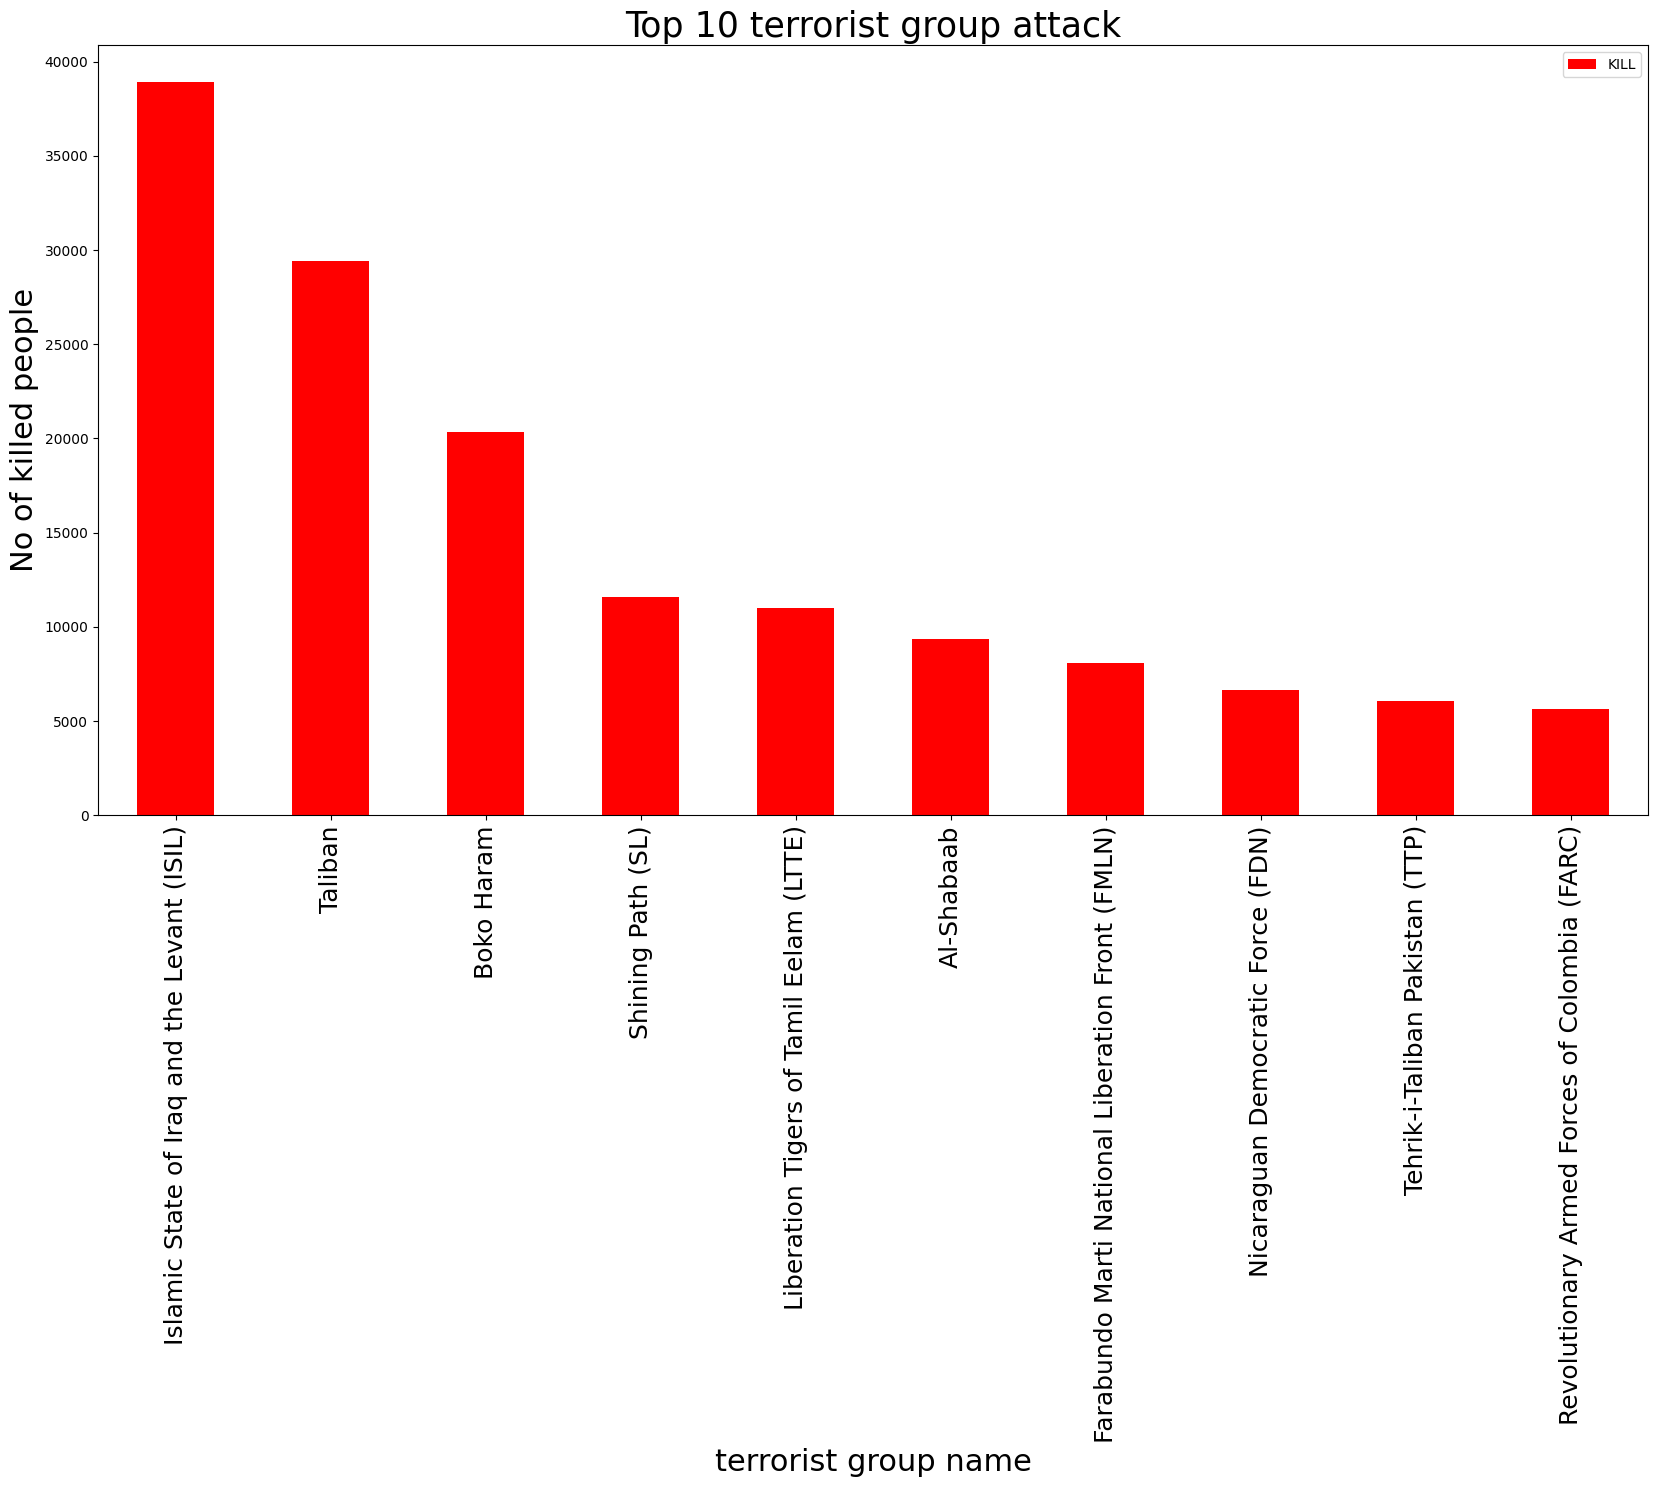

In [33]:
datanew[['GROUP','KILL']].groupby(['GROUP'],axis=0).sum().drop('Unknown').sort_values('KILL',ascending=False).head(10).plot(kind='bar',color='red',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=25)
plt.xlabel("terrorist group name",fontsize=22)
plt.ylabel("No of killed people",fontsize=22)
plt.xticks(rotation= 90, fontsize = 18)
plt.show()

### Top ten terrorist groups are-
#### Islamic State of Iraq and the Levant (ISIL) with 38923 people killed
#### Taliban with 29410 people killed
#### Boko Haram with 20328 killed
#### Shining Path (SL) with 11601 killed
#### Liberation Tigers of Tamil Eelam (LTTE) with 10989 killed
#### Al-Shabaab with 9330 killed
#### Farabundo Marti National Liberation Front (FMLN) 8065 killed
#### Nicaraguan Democratic Force (FDN) with 6662 killed
#### Tehrik-i-Taliban Pakistan (TTP) with 6042.0 killed
#### Revolutionary Armed Forces of Colombia (FARC) with 5661 killed

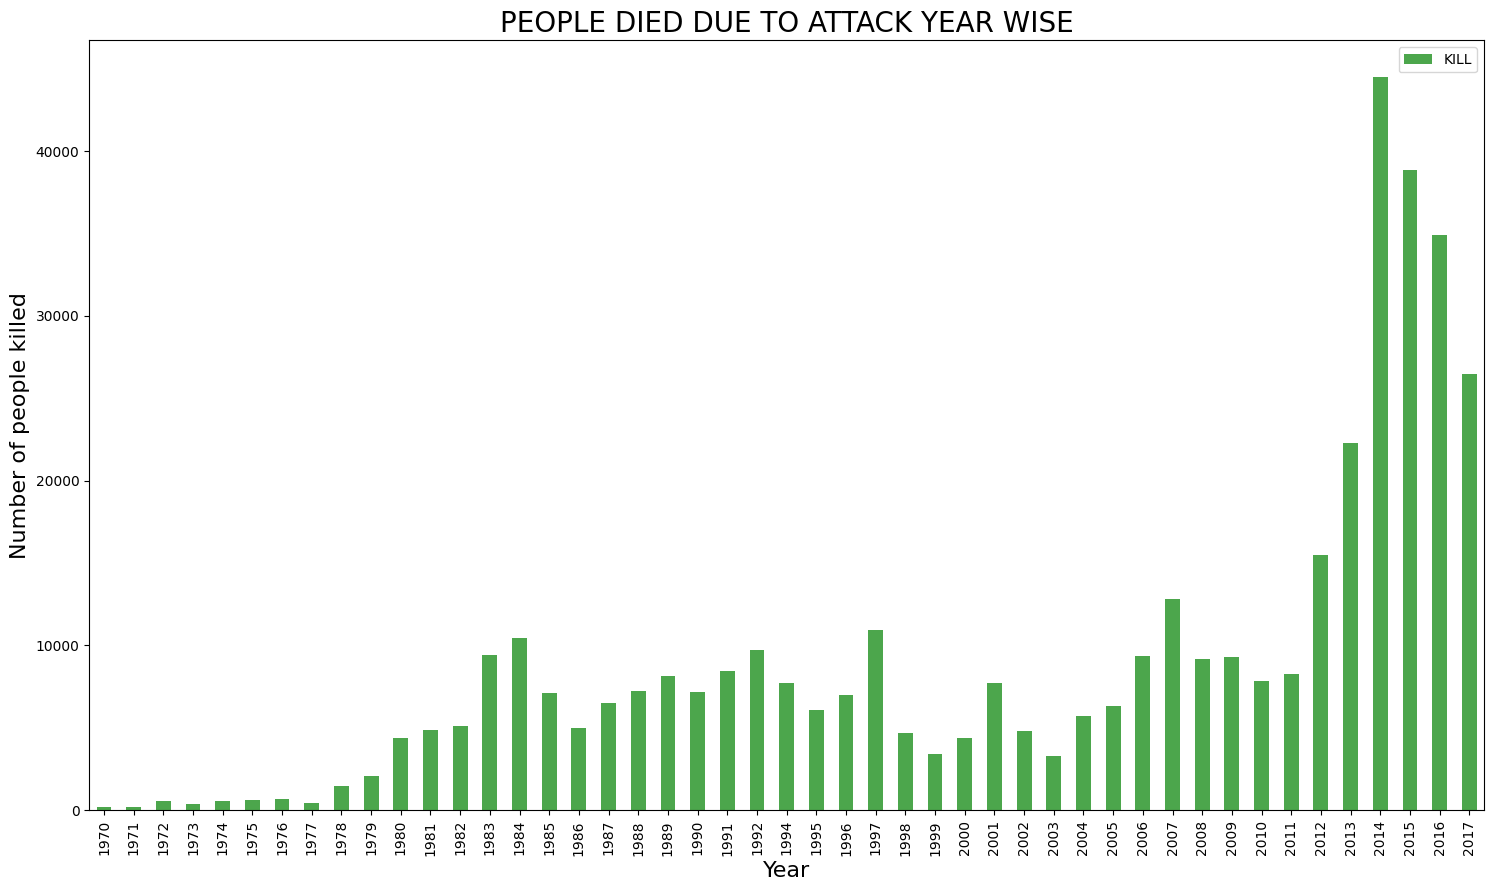

In [34]:
# number of people died due to attack year wise
fatality=datanew[['YEAR','KILL']].groupby(['YEAR']).sum()
fig,ax4 = plt.subplots(figsize=(18,10))
fatality.plot(kind='bar',alpha=0.7,ax=ax4, color='g')
plt.xticks(rotation = 90)
plt.title("PEOPLE DIED DUE TO ATTACK YEAR WISE",fontsize=20)
plt.ylabel("Number of people killed",fontsize=16)
plt.xlabel('Year',fontsize=16)
plt.show()

In [35]:
terrorism=datanew[['GROUP','COUNTRY','KILL']]

In [36]:
terrorism=terrorism.groupby(['GROUP','COUNTRY'],axis=0).sum().sort_values('KILL',ascending=False).drop('Unknown').reset_index().head(12)
terrorism

,GROUP,COUNTRY,KILL
0,Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
1,Taliban,Afghanistan,29269.0
2,Boko Haram,Nigeria,16917.0
3,Shining Path (SL),Peru,11595.0
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
5,Al-Shabaab,Somalia,8176.0
6,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
7,Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
8,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
9,Tehrik-i-Taliban Pakistan (TTP),Pakistan,6014.0


In [37]:
total_kill = datanew.loc[:,'KILL']
print('Total number of people killed by terrorist attack is', int(sum(total_kill.dropna())))

Total number of people killed by terrorist attack is 411868


### Total number of people killed by terrorist attack is 411868

In [38]:
kill_type = datanew.pivot_table(columns='ATTACK_TYPE', values='KILL', aggfunc='sum')
kill_type

ATTACK_TYPE,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
KILL,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


### The above output is showing the number of deaths with respective to attack type

In [39]:
Kill_wrt_country = datanew.pivot_table(columns='COUNTRY', values='KILL', aggfunc='sum')
Kill_wrt_country

COUNTRY,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia-Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Costa Rica,Croatia,Cuba,Cyprus,Czech Republic,Czechoslovakia,Democratic Republic of the Congo,Denmark,Djibouti,Dominica,Dominican Republic,East Germany (GDR),East Timor,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Falkland Islands,Fiji,Finland,France,French Guiana,French Polynesia,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guadeloupe,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hong Kong,Hungary,Iceland,India,Indonesia,International,Iran,Iraq,Ireland,Israel,Italy,Ivory Coast,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kosovo,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia,Libya,Lithuania,Luxembourg,Macau,Macedonia,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Martinique,Mauritania,Mauritius,Mexico,Moldova,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,New Caledonia,New Hebrides,New Zealand,Nicaragua,Niger,Nigeria,North Korea,North Yemen,Norway,Pakistan,Panama,Papua New Guinea,Paraguay,People's Republic of the Congo,Peru,Philippines,Poland,Portugal,Qatar,Republic of the Congo,Rhodesia,Romania,Russia,Rwanda,Saudi Arabia,Senegal,Serbia,Serbia-Montenegro,Seychelles,Sierra Leone,Singapore,Slovak Republic,Slovenia,Solomon Islands,Somalia,South Africa,South Korea,South Sudan,South Vietnam,South Yemen,Soviet Union,Spain,Sri Lanka,St. Kitts and Nevis,St. Lucia,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Vatican City,Venezuela,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
KILL,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,258.0,1.0,44.0,1244.0,76.0,14.0,79.0,3.0,0.0,9.0,42.0,79.0,11.0,203.0,0.0,28.0,134.0,4205.0,543.0,2347.0,365.0,1990.0,1119.0,228.0,1008.0,14698.0,1.0,17.0,248.0,8.0,45.0,6.0,27.0,4069.0,5.0,274.0,3.0,34.0,2.0,9.0,54.0,3869.0,12053.0,2.0,46.0,3.0,1765.0,0.0,8.0,11.0,534.0,1.0,0.0,6.0,13.0,278.0,84.0,19.0,325.0,9.0,8.0,5167.0,213.0,17.0,41.0,336.0,307.0,4.0,6.0,0.0,19341.0,1238.0,1.0,1673.0,78589.0,117.0,1703.0,420.0,268.0,42.0,66.0,133.0,39.0,1948.0,83.0,63.0,10.0,27.0,2.0,4061.0,46.0,177.0,2598.0,1.0,0.0,1.0,49.0,31.0,33.0,152.0,20.0,1432.0,5.0,0.0,43.0,0.0,780.0,13.0,1.0,292.0,2711.0,1280.0,220.0,1969.0,37.0,35.0,0.0,1.0,10598.0,1474.0,22682.0,3.0,3.0,79.0,23822.0,38.0,79.0,59.0,15.0,12771.0,9559.0,9.0,32.0,7.0,182.0,217.0,4.0,4308.0,3236.0,672.0,325.0,3.0,3.0,0.0,840.0,5.0,7.0,1.0,4.0,10273.0,2674.0,10.0,2634.0,81.0,0.0,96.0,1288.0,15530.0,0.0,2.0,3883.0,29.0,6.0,22.0,74.0,15229.0,60.0,307.0,73.0,2742.0,76.0,6.0,351.0,6888.0,3.0,3065.0,2261.0,123.0,3410.0,3771.0,6.0,68.0,0.0,0.0,227.0,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0


### The above output is showing the deaths with respect to its Country

# Conclusion
### Country with the most number of attacks is "Iraq" with 78589 deaths
### Region with the most number of attacks is "Middle East and North Africa"
### Year with the most number of attacks is "2014"
### Month with the most number of attacks is "May"
### Most type of attacks is "Bombing/Explosion"
### Total number of people killed by terrorist attack is 411868
## Top 10 terrorist group attack-
#### 1)Islamic State of Iraq and the Levant (ISIL)
#### 2)Taliban
#### 3)Boko Haram
#### 4)Shining Path (SL)
#### 5)Liberation Tigers of Tamil Eelam (LTTE)
#### 6)Al-Shabaab
#### 7)Farabundo Marti National Liberation Front (FMLN)
#### 8)Nicaraguan Democratic Force (FDN)
#### 9)Tehrik-i-Taliban Pakistan (TTP)
#### 10)Revolutionary Armed Forces of Colombia (FARC)